## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

In [44]:
import os
import math
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [45]:
def get_output_dir():
    output_dir = './output_images'
    
    if not os.path.isdir(output_dir):
        os.mkdir(output_dir)
        
    return output_dir

def get_doc_dir():
    output_dir = './output_images'
    
    if not os.path.isdir(output_dir):
        os.mkdir(output_dir)
        
    return output_dir

def save_doc_img(img, name):
    mpimg.imsave(os.path.join(get_doc_dir(), name + '.jpg'), img)
    
def use_debug():
    return True

# Camera Calibration
The first step is to perform camera calibration, to obtain the camera calibration matrix and the distortion coefficients

### Extract chessboard corners

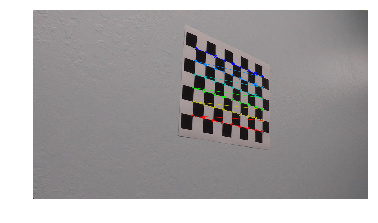

In [46]:
# Path to calibration images
calibration_images_paths = glob.glob('./camera_cal/*.jpg')

# prepare object points
nx = 9 #the number of inside corners in x
ny = 6 #the number of inside corners in y

# Define object points for each image. We assume that each square
# has a size of 1 meter, and the origin is the top-left corner
# of the first square.
obj_pts_i = np.zeros((nx*ny, 3), np.float32)
obj_pts_i[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Declare obj and img points
obj_pts = []
img_pts = []

plotted_img = True

# Loop over images
for img_path in calibration_images_paths:
    # Read image
    img = cv2.imread(img_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        # Add points to list
        img_pts.append(corners)
        obj_pts.append(obj_pts_i)
        
        # Draw resulting corners for the first image
        if plotted_img:
            cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
            plt.imshow(img);
            plt.axis('off');
            save_doc_img(img, 'checkerboard_corners')
            #cv2.waitKey(500)
    else:
        print('Warning: could not extract checkboard points from %s.' % img_path)

### Get calibration coefficients

In [47]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_pts, img_pts, gray.shape[::-1], None, None)

# Image Undistortion

In [48]:
def undistort_img(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

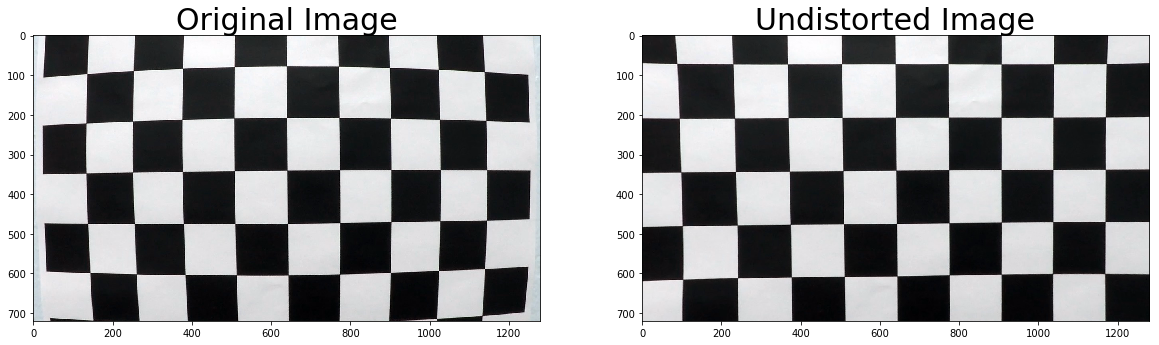

In [49]:
test_img = './camera_cal/calibration1.jpg'
img = cv2.imread(test_img)
dst = undistort_img(img)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

save_doc_img(img, 'img_distorted')
save_doc_img(img_undistorted, 'img_undistored')

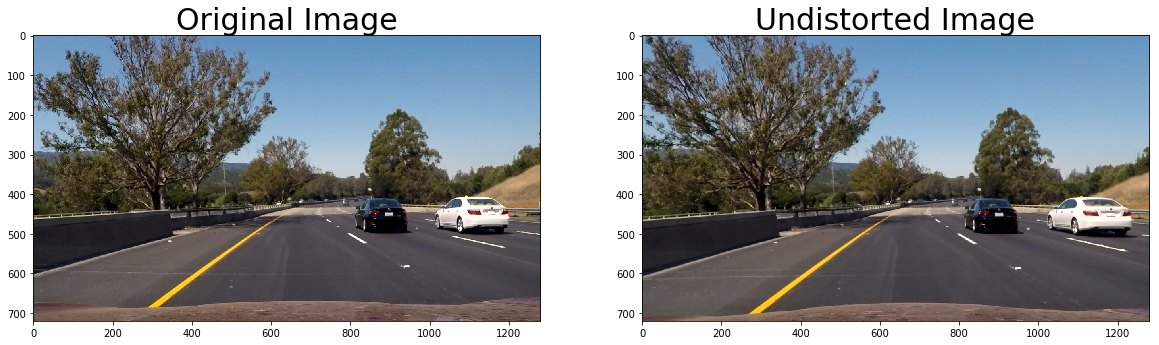

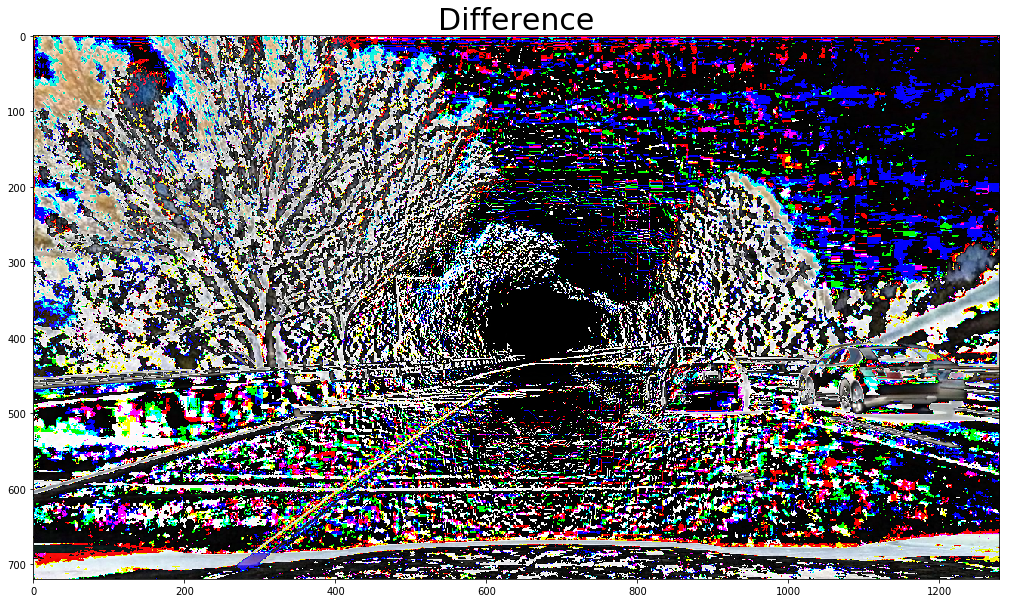

In [50]:
# Test on an image
test_img = './test_images/test6.jpg'
img = mpimg.imread(test_img)
dst = undistort_img(img)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(dst - img)
ax1.set_title('Difference', fontsize=30)

# Color Spaces

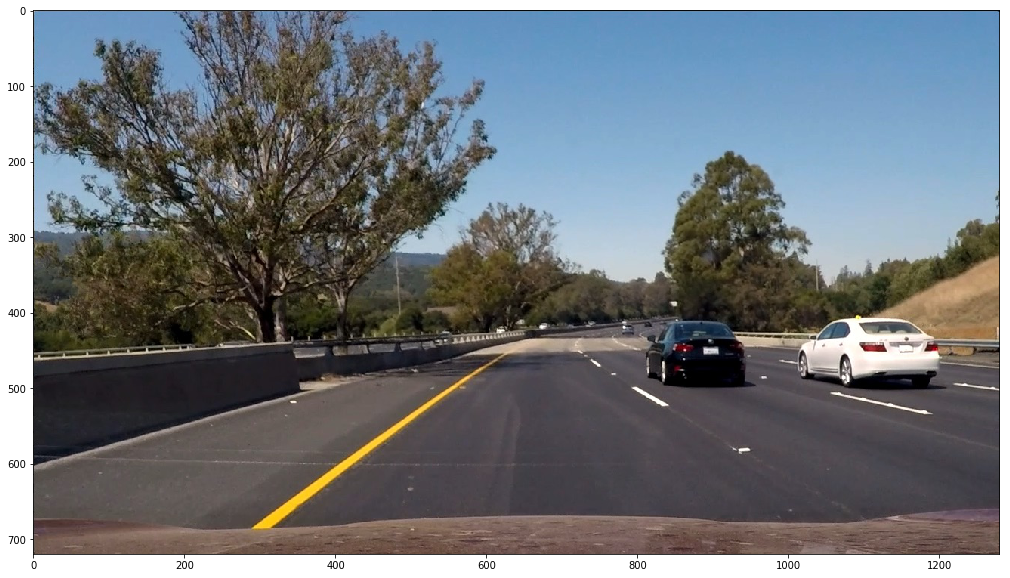

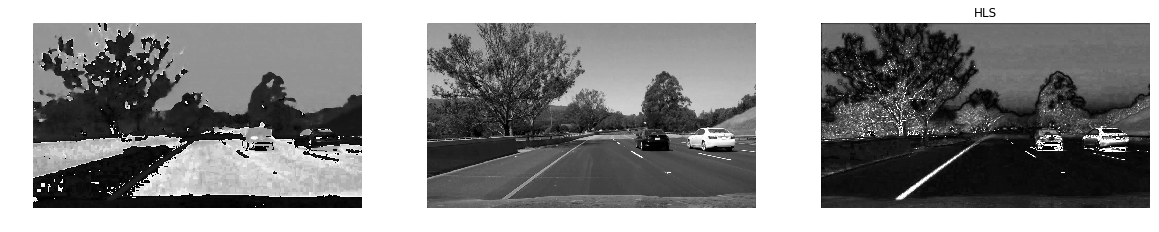

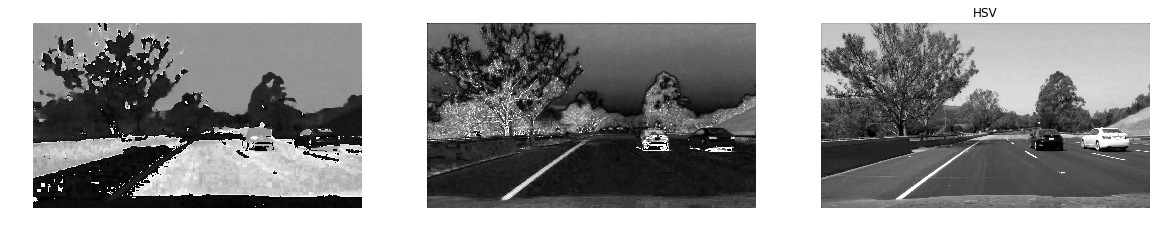

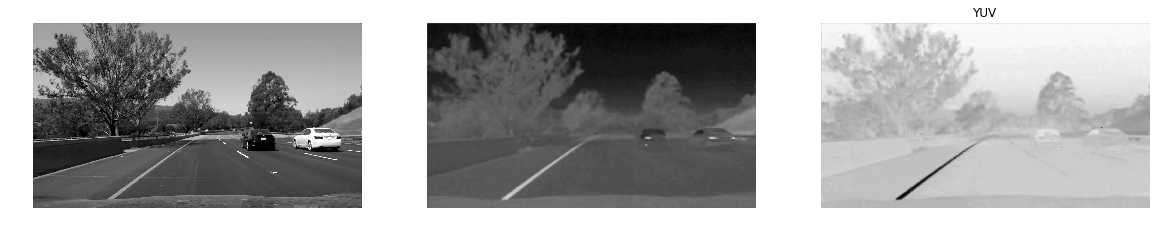

In [53]:
def display_color_space(img, cv_conversion_code, title):
    img_conv = cv2.cvtColor(img, cv_conversion_code)
    
    plt.figure(figsize=(20,10))
    
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        img_i = img_conv[:, :, i]
        plt.imshow(255*(img_i/np.max(img_i)), cmap='gray')
        plt.axis('off')
    plt.title(title)
       
test_img = './test_images/test6.jpg'
img = mpimg.imread(test_img)
plt.figure(figsize=(20,10))
plt.imshow(img)

display_color_space(img, cv2.COLOR_RGB2HLS, 'HLS')
display_color_space(img, cv2.COLOR_RGB2HSV, 'HSV')
display_color_space(img, cv2.COLOR_RGB2YUV, 'YUV')